# Ejercicio 1. Control de temperatura en una ducha

autora: Virginia Ordoño Bernier

Queremos que el sistema determine cuánto caliente debe estar el agua en base a dos variables difusas: 

- "temperatura del agua" 
- "tiempo de la ducha". 

Utilizaremos conjuntos difusos para cada variable y reglas difusas para tomar decisiones.

Conjuntos difusos:

Temperatura del agua:
Fría: [0°C, 20°C]
Templada: [15°C, 40°C]
Caliente: [30°C, 60°C]

Tiempo de la ducha:
Corto: [0 min, 10 min]
Medio: [5 min, 20 min]
Largo: [15 min, 30 min]

Reglas difusas:
Si la temperatura del agua es fría y el tiempo de la ducha es corto, entonces la salida es "Baja temperatura".
Si la temperatura del agua es templada y el tiempo de la ducha es medio, entonces la salida es "Temperatura moderada".
Si la temperatura del agua es caliente y el tiempo de la ducha es largo, entonces la salida es "Alta temperatura".

a) Pregunta: Dado que la temperatura del agua es de 25°C y el tiempo de la ducha es de 15 minutos, 
¿cuál debería ser la temperatura del agua según el sistema de lógica difusa?
b) Implementar en Phyton
 Instalar bibliotecas:
scikit-fuzzy para manejar operaciones de lógica difusa
matplotlib para visualización

## 1. Importación de librerías

In [35]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## 2. Definición de variables difusas

In [36]:
# Defining input dizzy variables. numpy.arange(start, stop, step)
water_temp = ctrl.Antecedent(np.arange(0, 61, 1), 'temperatura_agua')
shower_time = ctrl.Antecedent(np.arange(0, 31, 1), 'tiempo_ducha')

# Definition of output dizzy variables 
output_temp = ctrl.Consequent(np.arange(0, 101, 1), 'temperatura_salida')

## 3. Definición de conjuntos difusos

In [37]:
water_temp['fria'] = fuzz.trimf(water_temp.universe, [0, 0, 20])
water_temp['templada'] = fuzz.trimf(water_temp.universe, [15, 27.5, 40])
water_temp['caliente'] = fuzz.trimf(water_temp.universe, [30, 45, 60])

shower_time['corto'] = fuzz.trimf(shower_time.universe, [0, 0, 10])
shower_time['medio'] = fuzz.trimf(shower_time.universe, [5, 12.5, 20])
shower_time['largo'] = fuzz.trimf(shower_time.universe, [15, 22.5, 30])

output_temp['baja'] = fuzz.trimf(output_temp.universe, [0, 0, 50])
output_temp['moderada'] = fuzz.trimf(output_temp.universe, [25, 50, 75])
output_temp['alta'] = fuzz.trimf(output_temp.universe, [50, 100, 100])


## 4. Reglas difusas

In [38]:
rule1 = ctrl.Rule(water_temp['fria'] & shower_time['corto'], output_temp['baja'])
rule2 = ctrl.Rule(water_temp['templada'] & shower_time['medio'], output_temp['moderada'])
rule3 = ctrl.Rule(water_temp['caliente'] & shower_time['largo'], output_temp['alta'])

## 5. Sistema de control difuso

In [39]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3])
shower_temp_ctrl = ctrl.ControlSystemSimulation(control_system)

## 6. Caso de uso

Dado que la temperatura del agua es de 25°C y el tiempo de la ducha es de 15 minutos, 
¿cuál debería ser la temperatura del agua según el sistema de lógica difusa?

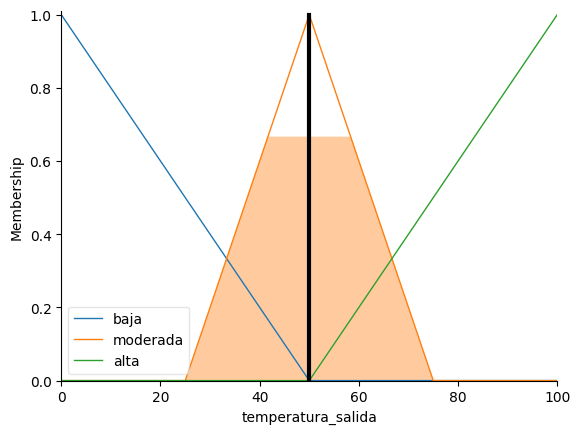

La temperatura del agua según el sistema de lógica difusa es de 50.0 grados.


In [40]:
# User inputs
shower_temp_ctrl.input['temperatura_agua'] = 25
shower_temp_ctrl.input['tiempo_ducha'] = 15

# Compute the result
shower_temp_ctrl.compute()

# Get the output temperature
output_temp_final = shower_temp_ctrl.output['temperatura_salida']

# Visualize the output temperature
output_temp.view(sim=shower_temp_ctrl)
plt.show()

print(f"La temperatura del agua según el sistema de lógica difusa es de {round(output_temp_final, 2)} grados.")
